
<a id='mccall'></a>
<div id="qe-notebook-header" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>

# Pesquisa de Emprego I: O Modelo de Pesquisa de McCall

## Conteúdo

- [Pesquisa de Emprego I: O Modelo de Pesquisa de McCall](#Pesquisa-de-Emprego-I:-O-Modelo-de-Pesquisa-de-McCall)  
  - [Resumo](#Resumo)  
  - [O Modelo de McCall](#O-Modelo-de-McCall)  
  - [Computando a Política Ótima: Parte 1](#Computando-a-Política-Ótima:-Parte-1)  
  - [Computando a Política Ótima: Parte 2](#Computando-a-Política-Ótima:-Parte-2)  
  - [Exercícios](#Exercícios)  
  - [Soluções](#Soluções)  

> *Devidamente traduzido, revisado e adaptado do [QuantEcon](https://quantecon.org/) pelos bolsistas CNPq, Pedro Luiz H. Furtado e Jonas Aragão M. Corpes, sob supervisão do Prof. Christiano Penna, do CAEN/UFC.*

>> "Questionar um funcionário da McCall é como ter uma conversa com um amigo desempregado: 'Talvez você esteja exagerando', ou 'Por que você deixou o seu emprego antes de ter um novo?' Esta é uma ciência social real: uma tentativa de modelar, entender o comportamento humano, visualizando a situação em que as pessoas se encontram, as opções que enfrentam e os prós e contras como elas mesmas as veem.” – Robert E. Lucas, Jr.

## Resumo

O modelo de pesquisa de McCall [[McC70]](https://julia.quantecon.org/../zreferences.html#mccall1970) ajudou a transformar a maneira de pensar dos economistas sobre o mercado de trabalho.

Para esclarecer noções vagas, como o desemprego "involuntário", McCall modelou o problema de decisão dos agentes desempregados diretamente, em termos de fatores como:

- Atuais e prováveis salários futuros.  
- Impaciência.
- seguro desemprego, 


Para resolver o problema de decisão ele usou programação dinâmica.

Aqui, configuramos o modelo de McCall e adotamos o mesmo método de solução.

Como veremos, o modelo de McCall não é apenas interessante por si só, mas também um excelente veículo para o aprendizado de programação dinâmica.

## O Modelo de McCall


<a id='index-0'></a>
Um trabalhador desempregado recebe em cada período uma oferta de emprego com salário $ W_t $.

No momento $ t $, nosso trabalhador tem duas escolhas:

1. Aceitar a oferta e trabalhar permanentemente com um salário constante $ W_t $.  
1. Rejeitar a oferta, receber o seguro desemprego $ c $, e reconsiderar o próximo período.  


A sequência salarial $ \{W_t\} $ é assumida a ser iid com função densidade de probabilidade $ p_1, \ldots, p_n $.

Aqui $ p_i $ é a probabilidade de obeservar a oferta de trabalho $ W_t = w_i $ no conjuto $ w_1, \ldots, w_n $.

O trabalhador tem vida infinita e tem como objetivo maximizar a soma esperada dos ganhos com desconto.

$$
\mathbb{E} \sum_{t=0}^{\infty} \beta^t Y_t
$$

A constante $ \beta $ está entre $ (0, 1) $ e é chamada de **fator de desconto**.

Quanto menor é $ \beta $, mais o trabalhador desconta a utilidade do futuro em relação a utilidade atual.

A variável $ Y_t $ é a renda, igual a:

- Seu salário $ W_t $ quando empregado.  
- Seguro desemprego $ c $ quando desempregado. 

### Um Trade Off

O trabalhador enfrenta um trade-off:

- Esperar demais por uma boa oferta é caro, pois o futuro é descontado.
- Aceitar muito cedo é caro, pois melhores ofertas podem chegar no futuro.  

Para decidir da melhor maneira possível diante dessa troca, usamos a programação dinâmica.

A programação dinâmica pode ser pensada como um procedimento de duas etapas que:

1. primeiro atribui valores a “estados” e,  
1. então deduz as ações ideais, dados esses valores. 


Seguiremos essas etapas sucessivamente.

### A Função de Valor

Para otimizar as recompensas atuais e futuras, precisamos pensar em duas coisas:

1. Os pagamentos atuais que recebemos de diferentes opções.
1. Os diferentes estados que essas escolhas levarão ao próximo período (nesse caso, emprego ou desemprego). 


Para ponderar esses dois aspectos do problema de decisão, precisamos atribuir *valores* a estados.

Para esse fim, se $ V(w) $ o *valor* total da vida útil acumulado para um trabalhador desempregado que entra no período atual desempregado, mas com oferta de salário $ w $ nas mãos.

Mais precisamente, $ V(w) $ denota o valor de uma função objetivo [(1)](https://julia.quantecon.org/mccall_model_with_separation.html#equation-objective) quando um agente nessa situação faz decisões *ótimas* agora e em todos os momentos do futuro.

Claro que $ V(w) $ não é trivial para calcular porque ainda não conhecemos quais decisões são ótimas e quais não são!

Mas pense em $ V $ como uma função que atribui a cada salário possível $ w $ o valor máximo da vida útil que pode ser obtido com essa oferta em mãos.

Uma observação crucial é que essa função $ V $ deve satisfazer:


<a id='equation-odu-pv'></a>
$$
V(w)
= \max \left\{
        \frac{w}{1 - \beta}, \, c + \beta \sum_{i=1}^n V(w_i) p_i
    \right\} \tag{1}
$$

para todo possível $ w_i $  em $ w_1, \ldots, w_n $.

Essa importante equação é uma versão importante da **equação de Bellman**,  que é onipresente na dinâmica econômica e em outros campos que envolvem planejamento ao longo do tempo.

A intuição por trás disso é a seguinte:

- o primeiro termo dentro da operação máxima é o retorno vitalício da aceitação da oferta atual $ w $, desde:  


$$
w + \beta w + \beta^2 w + \cdots = \frac{w}{1 - \beta}
$$

- o segundo termo dentro da operação  de máximização é o **valor de continuação**, que é a recompensa vitalícia por rejeitar a oferta atual e depois se comportar de maneira ideal em todos os períodos subsequentes.


Se otimizarmos e escolhermos o melhor dessas duas opções, obteremos o valor máximo da vida útil a partir de hoje, dada a oferta atual $ V(w) $, que é o l.h.s. de [(1)](#equation-odu-pv).

### A Política Ideal

Suponha que, por enquanto, possamos resolver [(1)](#equation-odu-pv) a função desconhecida $ V $.

Uma vez que tenhamos essa função em mãos, podemos nos comportar de maneira ideal (ou seja, fazer a escolha certa entre aceitar e rejeitar).

Tudo o que precisamos fazer é selecionar a opção máxima no r.h.s de [(1)](#equation-odu-pv).

A ação ideal é melhor pensada como uma  **política**, que é, em geral, um mapa de estados para ações.

No nosso caso, o estado é a oferta de salário atual $ w $.

Dado que para *qualquer* $ w $, podemos ler como a melhor opção correspondente (aceitar ou rejeitar) escolhendo o máximo no r.h.s de [(1)](#equation-odu-pv).

Então, temos um mapa de $ \mathbb{R} $ para $ \{0, 1\} $, com 1 significando aceitar e zero significando rejeitar.

Podemos escrever a política como a seguinte:

$$
\sigma(w) := \mathbf{1}
    \left\{
        \frac{w}{1 - \beta} \geq c + \beta \sum_{i=1}^n V(w_i) p_i
    \right\}
$$

Aqui $ \mathbf{1}\{ P \} = 1 $ se $ P $ é verdadeiro e igual a zero caso contrário.

Podemos também escrever isso como:

$$
\sigma(w) := \mathbf{1} \{ w \geq \bar w \}
$$

onde:


<a id='equation-odu-barw'></a>
$$
\bar w := (1 - \beta) \left\{ c + \beta \sum_{i=1}^n V(w_i) p_i \right\} \tag{2}
$$

Aqui $ \bar w $ é uma constante dependendo de $ \beta, c $ e a distribuição do salário, chamada de *salário de reserva*.

O agente deve aceitar se e somente se a oferta de salário atual exceder o salário de reserva.

Claramente, podemos computar esse salário de reserva se pudermos computar a função de valor.

## Computando a Política Ótima: Parte 1

Para colocar as idéias acima em ação, precisamos computar a função de valor nos pontos $ w_1, \ldots, w_n $.

Ao fazer isso, podemos identificar esses valores como o vetor $ v = (v_i) $ onde $ v_i := V(w_i) $.

Em vista de [(1)](#equation-odu-pv), este vetor satisfaz o sistema de equações não-lineares:


<a id='equation-odu-pv2'></a>
$$
v_i
= \max \left\{
        \frac{w_i}{1 - \beta}, \, c + \beta \sum_{i=1}^n v_i p_i
    \right\}
\quad
\text{for } i = 1, \ldots, n \tag{3}
$$

Acontece que existe exatamente um vetor $ v := (v_i)_{i=1}^n $ em
$ \mathbb R^n $ que satisfaz essa equação.

### O Algoritmo

Para computar esse vetor, procedemos da seguinte maneira:

Passo 1: escolha uma suposição inicial arbitrária  $ v \in \mathbb R^n $.

Passo 2: compute um novo vetor $ v' \in \mathbb R^n $ via


<a id='equation-odu-pv2p'></a>
$$
v'_i
= \max \left\{
        \frac{w_i}{1 - \beta}, \, c + \beta \sum_{i=1}^n v_i p_i
    \right\}
\quad
\text{for } i = 1, \ldots, n \tag{4}
$$

Passo 3: calcule uma medida de desvio entre $ v $ e $ v' $, tal como $ \max_i |v_i - v_i'| $.

Passo 4: se o desvio for maior que alguma tolerância fixa, defina $ v = v' $ e vá para o passo 2, caso contrário continue.

Passo 5: retorne $ v $.

Esse algoritmo retorna uma aproximação arbitrariamente boa da solução verdadeira para [(3)](#equation-odu-pv2), que representa a função de valor.

(Arbitrariamente bom aqui significa que a aproximação converge para a solução verdadeira à medida que a tolerância chega a zero)

### A Teoria do Ponto Fixo

Qual é a matemática por trás dessas idéias?

Primeiro, define-se um mapeamento $ T $ de $ \mathbb R^n $ para si mesmo via:


<a id='equation-odu-pv3'></a>
$$
Tv_i
= \max \left\{
        \frac{w_i}{1 - \beta}, \, c + \beta \sum_{i=1}^n v_i p_i
    \right\}
\quad
\text{para } i = 1, \ldots, n \tag{5}
$$

(Um novo vetor $ Tv $ é obtido a partir de um dado vetor $ v $ avaliando os r.h.s em cada $ i $)

Pode-se mostrar que as condições do teorema do mapeamento da contração de Banach são satisfeitas por $ T $ como um auto-mapeamento no $ \mathbb{R}^n $.

Uma implicação é que $ T $ tem um único ponto fixo no $ \mathbb R^n $.

Além disso, é imediato a partir da definição de $ T $ que esse ponto fixo é precisamente a função de valor.

O algoritmo iterativo apresentado acima corresponde à iteração com
$ T $ a partir de alguma suposição inicial $ v $.

O teorema do mapeamento da contração de Banach nos diz que esse processo iterativo gera uma sequência que converge para o ponto fixo.

### Implementação

### Configuração

In [1]:
using InstantiateFromURL
github_project("QuantEcon/quantecon-notebooks-julia", version = "0.5.0")
# github_project("QuantEcon/quantecon-notebooks-julia", version = "0.5.0", instantiate = true)

In [2]:
using LinearAlgebra, Statistics
using Distributions, Expectations, NLsolve, Roots, Random, Plots, Parameters

In [3]:
gr(fmt = :png);;

Aqui está a distribuição de ofertas salariais com as quais trabalharemos.

support(dist) = 0:50


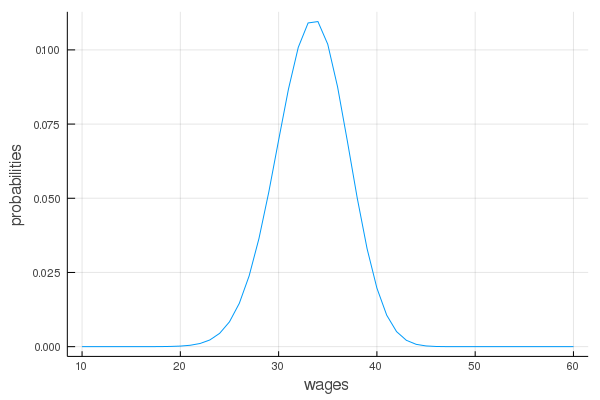

In [4]:
n = 50
dist = BetaBinomial(n, 200, 100) #distribuição de probabilidade
@show support(dist)
w = range(10.0, 60.0, length = n+1) # linearmente espaço de salários

using StatsPlots
plt = plot(w, dist, xlabel = "wages", ylabel = "probabilities", legend = false)

Podemos explorar assumindo expectativas em relação a essa distribuição

In [5]:
E = expectation(dist) # operador expectativa

# explorando as propriedades do operador
wage(i) = w[i+1] # +1 para mapear a partir do suporte de 0
E_w = E(wage)
E_w_2 = E(i -> wage(i)^2) - E_w^2 # variância
@show E_w, E_w_2

# use o operador com multiplicação à esquerda
@show E * w # Os `w` são valores atribuidos para estados discretos
@show dot(pdf.(dist, support(dist)), w); # cálculo idêntico

(E_w, E_w_2) = (43.333333333335695, 12.919896640724573)
E * w = 43.3333333333357
dot(pdf.(dist, support(dist)), w) = 43.3333333333357


Para implementar nosso algoritmo, vamos dar uma olhada na sequência de funções de valor aproximado que esse algoritmo de ponto fixo gera.

Os valores padrão dos parâmetros são incorporados na função.

Nossa suposição inicial é que $ v $ é o valor de aceitar cada salário.

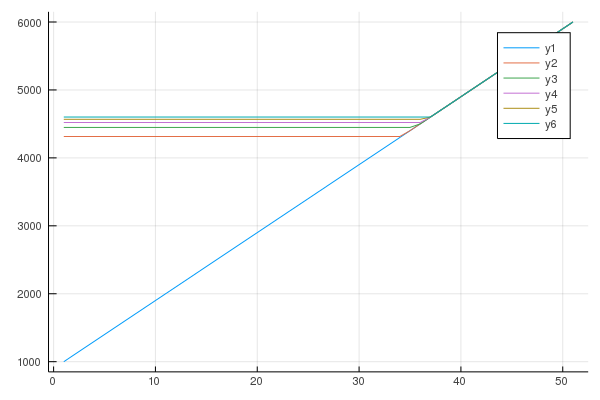

In [6]:
# parâmetros e objetos constantes

c = 25
β = 0.99
num_plots = 6

# Operador
T(v) = max.(w/(1 - β), c + β * E*v) # (5) transmite sobre w, corrige v
# alternativamente, T(v) = [max(wval/(1 - β), c + β * E*v) para wval em w]

# preenche a matriz de vs
vs = zeros(n + 1, 6) # dados para preencher
vs[:, 1] .= w / (1-β) # suposição inicial de "aceitar tudo"

# manualmente aplicando o operador
for col in 2:num_plots
    v_last = vs[:, col - 1]
    vs[:, col] .= T(v_last)  # aplique o operador
end
plot(vs)

Uma abordagem para resolver o modelo é implementar diretamente esse tipo de iteração e continuar até que o desvio medido entre iterações sucessivas esteja abaixo de tol.

In [7]:
function compute_reservation_wage_direct(params; v_iv = collect(w ./(1-β)), max_iter = 500,
                                         tol = 1e-6)
    @unpack c, β, w = params

    # crie um fechamento para o operador 
    T(v) = max.(w/(1 - β), c + β * E*v) # (5) fixando os valores dos parâmetros

    v = copy(v_iv) # inicia no valor inicial.  "copy' para evitar v_iv modificação
    v_next = similar(v)
    i = 0
    error = Inf
    while i < max_iter && error > tol
        v_next .= T(v) # (4)
        error = norm(v_next - v)
        i += 1
        v .= v_next  # copia o conteúdo para v.  Também poderia ser usado v[:] = v_next
    end
    # agora compute o salário de reserva
    return (1 - β) * (c + β * E*v) # (2)
end

compute_reservation_wage_direct (generic function with 1 method)

No exposto, usamos `v = copy(v_iv)` mais do que apenas `v_iv = v`.

Para entender porquê, primeiro lembre-se que `v_iv` é uma função argumento – por padrão, com o valor fornecido ou passado para a função.

> - Se tivessemos ido `v = v_iv`, então ela simplesmente criaria um novo nome `v` que se liga ao que estiver localizado em `v_iv`.  
- Uma vez que nós usamos mais tarde `v .= v_next` no algoritmo, os valores nele serão modificados.  
- Portanto, estariamos modificando o vetor `v_iv` em que passamos, o que pode não ser o que o chamador da função requerida. 
- O grande problema que isso cria são os "efeitos colaterais", nos quais você pode chamar uma função e coisas estranhas podem acontecer fora da função que você não esperava.
- Se você pretende que a modificação ocorra potencialmente, o guia de estilo da Julia diz que devemos chamar a função `compute_reservation_wage_direct!` para tornar claros os possíveis efeitos colaterais. 



Como de costume, é melhor usar um pacote, que pode fornecer um algoritmo melhor e provavelmente menos propenso a erros.

Nesse caso, podemos usar o algoritmo `fixedpoint` discutido em [em nossa aula Julia by Example](https://julia.quantecon.org/../getting_started_julia/julia_by_example.html) para encontrar o ponto fixo do operador $ T $.

In [8]:
function compute_reservation_wage(params; v_iv = collect(w ./(1-β)), iterations = 500,
                                  ftol = 1e-6, m = 6)
    @unpack c, β, w = params
    T(v) = max.(w/(1 - β), c + β * E*v) # (5) fixando os valores dos parâmetros

    v_star = fixedpoint(T, v_iv, iterations = iterations, ftol = ftol,
                        m = 6).zero # (5)
    return (1 - β) * (c + β * E*v_star) # (3)
end

compute_reservation_wage (generic function with 1 method)

Vamos computar o salário de reserva nos parâmetros padrão.

In [9]:
mcm = @with_kw (c=25.0, β=0.99, w=w) # tuples nomeadas

compute_reservation_wage(mcm()) # chamada com parâmetros padrão

47.316499766546215

### Estática Comparativa

Agora que sabemos como calcular o salário de reserva, vamos ver como isso varia com os parâmetros.

Em particular, vamos ver o que acontece quando mudamos $ \beta $ e
$ c $.

In [10]:
grid_size = 25
R = rand(grid_size, grid_size)

c_vals = range(10.0, 30.0, length = grid_size)
β_vals = range(0.9, 0.99, length = grid_size)

for (i, c) in enumerate(c_vals)
    for (j, β) in enumerate(β_vals)
        R[i, j] = compute_reservation_wage(mcm(c=c, β=β)) # mudança de padrões
    end
end

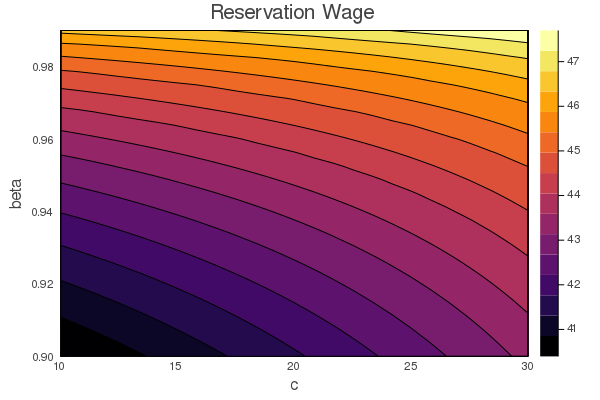

In [11]:
contour(c_vals, β_vals, R',
        title = "Reservation Wage",
        xlabel = "c",
        ylabel = "beta",
        fill = true)

Como esperado, o salário de reserva aumenta com paciência e com a indenização por desemprego.

## Computando a Política Ótima: Parte 2

A abordagem para a programação dinâmica descrita acima é muito padrão e amplamente aplicável.

Para esse problema em particular, há também uma maneira mais fácil, que contorna a necessidade de calcular a função de valor.

Se $ \psi $ denota o valor de não aceitar um emprego nesse período, mas depois se comportar de maneira ideal em todos os períodos subsequentes.

Isso é,


<a id='equation-j1'></a>
$$
\psi
= c + \beta
    \sum_{i=1}^n V(w_i) p_i \tag{6}
$$

onde $ V $ é a função de valor.

Pela equação de Bellman, então temos:

$$
V(w_i)
= \max \left\{ \frac{w_i}{1 - \beta}, \, \psi \right\}
$$

Substituindo essa última equação em [(6)](#equation-j1) dá.


<a id='equation-j2'></a>
$$
\psi
= c + \beta
    \sum_{i=1}^n
    \max \left\{
        \frac{w_i}{1 - \beta}, \psi
    \right\}  p_i \tag{7}
$$

Que também poderiamos escrever como $ \psi = T_{\psi}(\psi) $ para o operdador apropriado.

Esta é uma equação não-linear que podemos resolver por $ \psi $.

Um método de solução para esse tipo de equação não-linear é iterativo.

Isso é,

Passo 1: escolha uma suposição inicial $ \psi $.

Passo 2: compute a atualização $ \psi' $ via.


<a id='equation-j3'></a>
$$
\psi'
= c + \beta
    \sum_{i=1}^n
    \max \left\{
        \frac{w_i}{1 - \beta}, \psi
    \right\}  p_i \tag{8}
$$

Passo 3: calcule o desvio $ |\psi - \psi'| $.

Step 4: se o desvio for maior que alguma tolerância fixa, defina  $ \psi = \psi' $ e vá para o passo 2, caso contrário continue.

Passo 5: retorna $ \psi $.

Mais uma vez, pode-se usar o teorema do mapeamento de contração de Banach para mostrar que esse processo sempre converge.

A grande diferença aqui, no entanto, é que estamos iterando em um único número, em vez de um  vetor $ n $.

Aqui está uma implementação:

In [12]:
function compute_reservation_wage_ψ(c, β; ψ_iv = E * w ./ (1 - β), max_iter = 500,
                                    tol = 1e-5)
    T_ψ(ψ) = [c + β * E*max.((w ./ (1 - β)), ψ[1])] # (7)
    # usando vetores, pois o ponto fixo não suporta escalar 
    ψ_star = fixedpoint(T_ψ, [ψ_iv]).zero[1]
    return (1 - β) * ψ_star # (2)
end
compute_reservation_wage_ψ(c, β)

47.31649976654615

Você pode usar esse código para resolver o exercício abaixo.

Outra opção é resolver a raiz da equação  $ T_{\psi}(\psi) - \psi $.

In [13]:
function compute_reservation_wage_ψ2(c, β; ψ_iv = E * w ./ (1 - β), max_iter = 500,
                                     tol = 1e-5)
    root_ψ(ψ) = c + β * E*max.((w ./ (1 - β)), ψ) - ψ # (7)
    ψ_star = find_zero(root_ψ, ψ_iv)
    return (1 - β) * ψ_star # (2)
end
compute_reservation_wage_ψ2(c, β)

47.316499766546194

## Exercícios

### Exercício 1

Calcule a duração média do desemprego quando $ \beta=0.99 $ e
$ c $ toma os seguintes valores:

> `c_vals = range(10, 40, length = 25)`


Ou seja, comece o agente como desempregado, calculado o salário de reserva de acordo com os parâmetros e depois simule para ver quanto tempo leva para aceitar.

Repita um grande número de vezes e faça a média.

Traçe a duração média do desemprego em função de $ c $ em `c_vals`.

## Soluções


### Exercício 1

Aqui está uma solução:

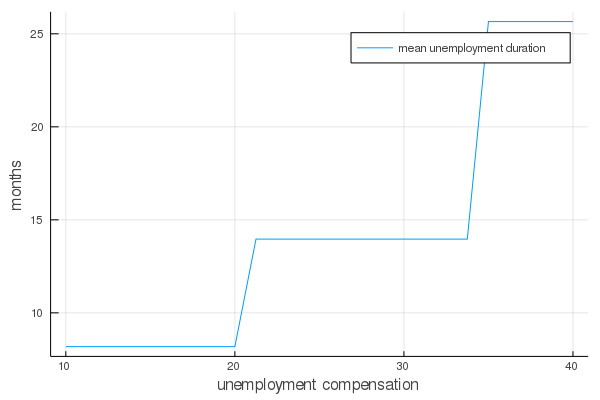

In [14]:
function compute_stopping_time(w̄; seed=1234)
    Random.seed!(seed)
    stopping_time = 0
    t = 1
    # certifique-se a restrição às vezes é obrigatório 
    @assert length(w) - 1 ∈ support(dist) && w̄ <= w[end]
    while true
        # Gerar um salário extraido
        w_val = w[rand(dist)] # o salário dist configurado anteriormente
        if w_val ≥ w̄
            stopping_time = t
            break
        else
            t += 1
        end
    end
    return stopping_time
end

compute_mean_stopping_time(w̄, num_reps=10000) = mean(i ->
                                                         compute_stopping_time(w̄,
                                                         seed = i), 1:num_reps)
c_vals = range(10,  40, length = 25)
stop_times = similar(c_vals)

beta = 0.99
for (i, c) in enumerate(c_vals)
    w̄ = compute_reservation_wage_ψ(c, beta)
    stop_times[i] = compute_mean_stopping_time(w̄)
end

plot(c_vals, stop_times, label = "mean unemployment duration",
     xlabel = "unemployment compensation", ylabel = "months")